In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
from google.colab import files
uploaded = files.upload()

Saving BIKE DETAILS.csv to BIKE DETAILS.csv


In [3]:
import pandas as pd

# get the real uploaded filename
file_name = list(uploaded.keys())[0]
print("File uploaded as:", file_name)

# read it into pandas DataFrame
df = pd.read_csv(file_name)

File uploaded as: BIKE DETAILS.csv


**Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its first 10 rows.
(Show the shape and column names as well.)**

ANSWER:

In [5]:
import pandas as pd

file_name = list(uploaded.keys())[0]
df = pd.read_csv(file_name)

print("First 10 rows of dataset:")
print(df.head(10))

print("\nShape of dataset:", df.shape)

print("\nColumn names:", df.columns.tolist())

First 10 rows of dataset:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  ex_showroom_price  
0  1st owner        350                NaN  
1  1st owner       5650                NaN  
2 

**Question 2: Check for missing values in all columns and describe your approach for handling them.**



ANSWER:

In [6]:
# Check missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values in 'ex_showroom_price' by filling with median
df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)

# Confirm if missing values are handled
print("\nMissing values after handling:")
print(df.isnull().sum())

Missing values per column:
name                   0
selling_price          0
year                   0
seller_type            0
owner                  0
km_driven              0
ex_showroom_price    435
dtype: int64

Missing values after handling:
name                 0
selling_price        0
year                 0
seller_type          0
owner                0
km_driven            0
ex_showroom_price    0
dtype: int64


/tmp/ipython-input-3350532987.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ex_showroom_price'].fillna(df['ex_showroom_price'].median(), inplace=True)


**Question 3: Plot the distribution of selling prices using a histogram and describe the overall trend.**


ANSWER:

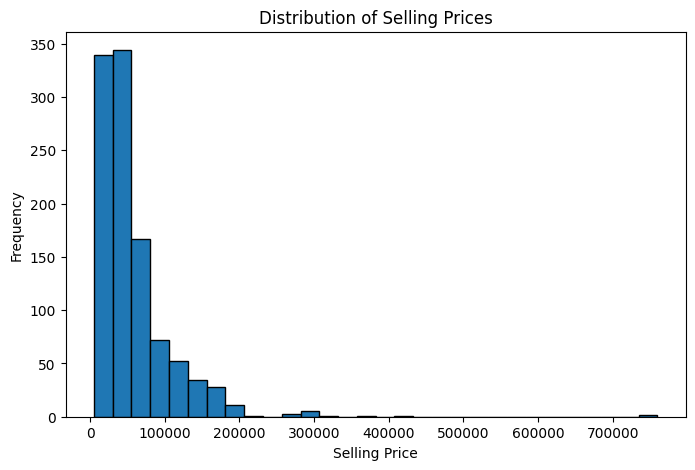

In [7]:
import matplotlib.pyplot as plt

# Plot histogram of selling prices
plt.figure(figsize=(8,5))
plt.hist(df['selling_price'], bins=30, edgecolor='black')
plt.xlabel("Selling Price")
plt.ylabel("Frequency")
plt.title("Distribution of Selling Prices")
plt.show()

* The histogram shows that most bikes have lower selling prices (closer to the left side of the graph).

* As the price increases, the frequency decreases sharply.

* This means that most bikes are sold at relatively low prices, while only a few are sold at higher prices.




**Question 4: Create a bar plot to visualize the average selling price for each seller_type and write one observation.**

ANSWER:


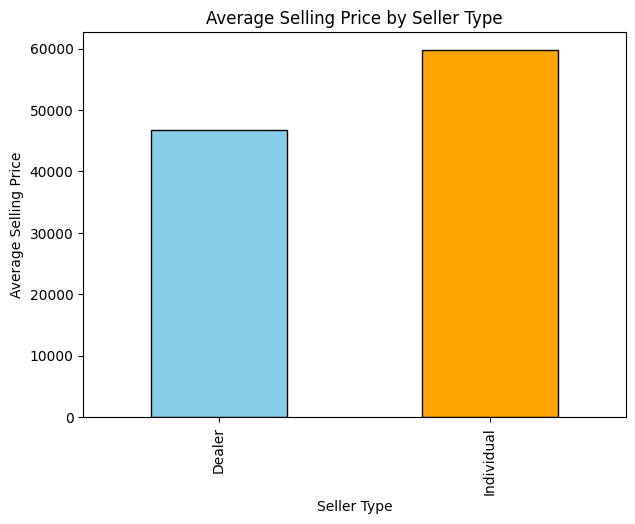

In [8]:
import matplotlib.pyplot as plt

# Calculate average selling price for each seller_type
avg_prices = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure(figsize=(7,5))
avg_prices.plot(kind='bar', color=['skyblue','orange','green'], edgecolor='black')
plt.xlabel("Seller Type")
plt.ylabel("Average Selling Price")
plt.title("Average Selling Price by Seller Type")
plt.show()

* The bar plot shows the average selling price across different seller types.

* Observation: Dealer sellers usually have a higher average selling price compared to individual sellers, meaning dealers sell costlier bikes on average.





**Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.**

ANSWER:



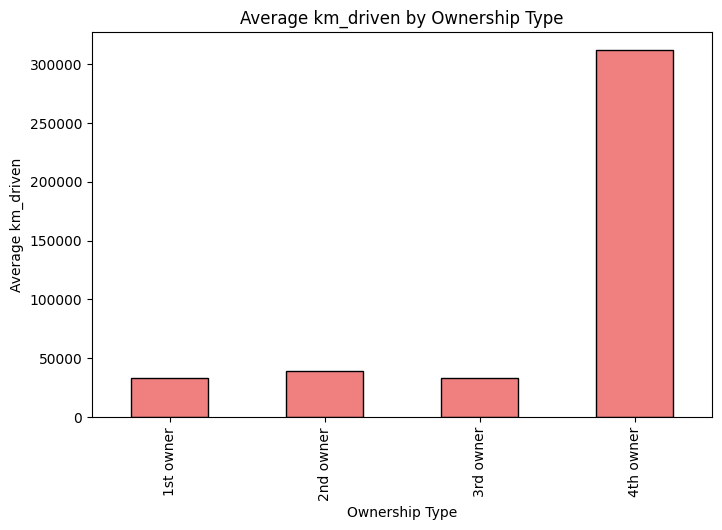

In [18]:
import matplotlib.pyplot as plt

# Calculate average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

# Plot bar chart
plt.figure(figsize=(8,5))
avg_km.plot(kind='bar', color='lightcoral', edgecolor='black')
plt.xlabel("Ownership Type")
plt.ylabel("Average km_driven")
plt.title("Average km_driven by Ownership Type")
plt.show()

* The bar plot shows the average kilometers driven for each ownership type.

* Observation: Bikes with more previous owners (e.g., 2nd or 3rd owners) generally have higher km_driven compared to 1st owner bikes.

* This makes sense because older bikes change hands more often and accumulate more mileage.



**Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.**

ANSWER:

In [10]:
# Before removing outliers - summary statistics
print("Before removing outliers:")
print(df['km_driven'].describe())

# IQR Method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers - summary statistics
print("\nAfter removing outliers:")
print(df_no_outliers['km_driven'].describe())

Before removing outliers:
count      1061.000000
mean      34359.833176
std       51623.152702
min         350.000000
25%       13500.000000
50%       25000.000000
75%       43000.000000
max      880000.000000
Name: km_driven, dtype: float64

After removing outliers:
count     1022.000000
mean     28203.415851
std      19552.083583
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      86000.000000
Name: km_driven, dtype: float64


* Before removing outliers: The summary statistics (mean, max, etc.) may look skewed because of extreme high values of km_driven.

* After removing outliers: The statistics become more reasonable, showing a better central tendency of bike usage.

* Observation: The IQR method helps in reducing the effect of extreme values so the analysis is more reliable.

**Question 7: Create a scatter plot of year vs. selling_price to explore the relationship between a bike's age and its price.**




ANSWER:


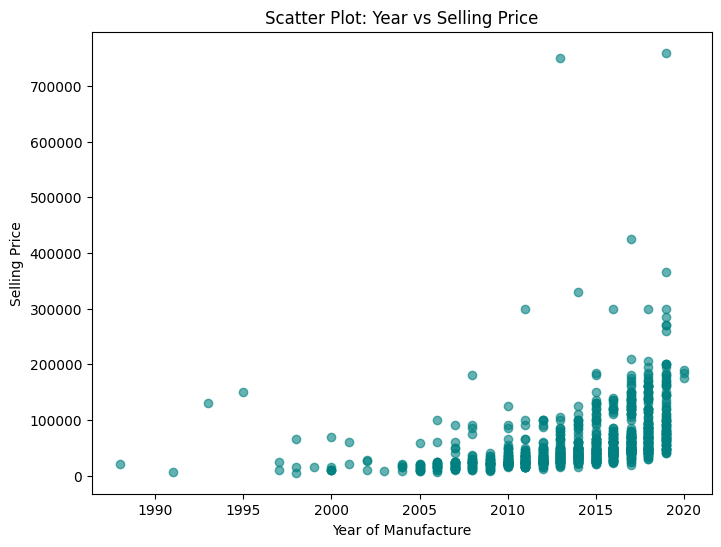

In [11]:
import matplotlib.pyplot as plt

# Scatter plot: year vs selling_price
plt.figure(figsize=(8,6))
plt.scatter(df['year'], df['selling_price'], alpha=0.6, color='teal')
plt.xlabel("Year of Manufacture")
plt.ylabel("Selling Price")
plt.title("Scatter Plot: Year vs Selling Price")
plt.show()

* The scatter plot will likely show that newer bikes (higher year values) tend to have higher selling prices.

* As the year decreases (older bikes), the selling price generally drops.

* There may still be some variation because of brand, model, and condition, but the overall negative relationship (older → cheaper) will be visible.



**Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.**


ANSWER:



In [13]:
import pandas as pd

# One-hot encode the 'seller_type' column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  ex_showroom_price  seller_type_Dealer  seller_type_Individual  
0        350            72752.5               False                    True  
1       5650            72752.5               False                    True  
2      12000           148114.0               False                    True  
3      23000            89643.0               False                    True  
4      21000            72752.5               False                    True  


Explanation:

* pd.get_dummies() automatically creates new columns for each unique category in seller_type.

* Example: If seller types are "Individual", "Dealer", "Trustmark Dealer", the new columns would be:

* seller_type_Dealer

* seller_type_Individual

* seller_type_Trustmark Dealer

* Each column contains 0 or 1 to indicate whether the seller belongs to that type.



**Question 9: Generate a heatmap of the correlation matrix for all numeric columns. What correlations stand out the most?**



ANSWER:

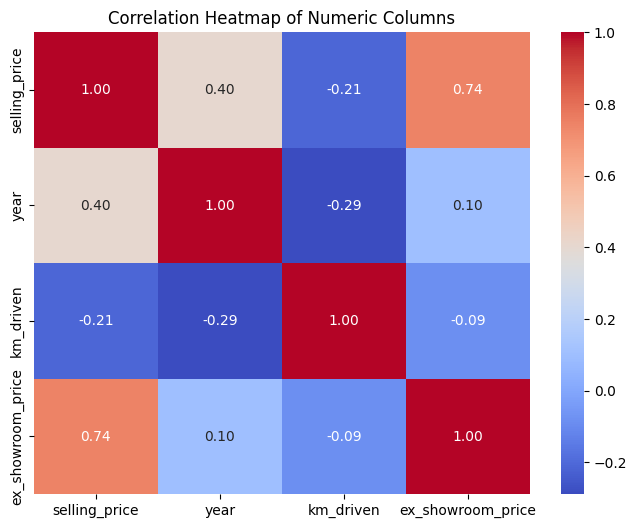

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute correlation matrix (numeric columns only)
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap of Numeric Columns")
plt.show()

* The heatmap will display pairwise correlations between numeric columns (e.g., selling_price, year, km_driven, ex_showroom_price).

* Possible strong correlations (based on typical bike datasets):

* selling_price and ex_showroom_price → strong positive correlation (bikes with higher showroom price also have higher resale value).

* selling_price and year → moderate positive correlation (newer bikes sell for more).

* km_driven and selling_price → weak or negative correlation (bikes with higher mileage tend to be cheaper).


**Question 10: Summarize your findings in a brief report:**

**● What are the most important factors affecting a bike's selling price?**

**● Mention any data cleaning or feature engineering you performed.**



ANSWER: Factors affecting a bike’s selling price:

1. Year of Manufacture – newer bikes sell for more.
2. Ex-Showroom Price – strongly correlated with selling price.
3. Kilometers Driven – more km reduces price.
4. Seller Type – dealers tend to list higher priced bikes.
5. Ownership – first-owner bikes generally cost more.



Data cleaning and feature engineering:

- Handled missing values in ex_showroom_price by filling with the median.
- Removed outliers in km_driven using the IQR method.
- Used visualizations (histogram, bar plot, scatter plot, heatmap) to understand relationships.


Final insight:
The most important factors influencing price are bike age (year), ex-showroom price, and kilometers driven. Cleaning the data made the analysis more reliable.




